In [2]:
options(warn = 0)
library(Hmisc)
library(caret)
library(AppliedPredictiveModeling)
library(dplyr)

In [3]:
data(concrete)
set.seed(1000)
inTrain <- createDataPartition(mixtures$CompressiveStrength, p = 3 / 4)[[1]]
training <- mixtures[inTrain, ]
testing <- mixtures[-inTrain, ]

## Make Factors

In [4]:
training$Cement <- cut2(training$Cement)
training$BlastFurnaceSlag <- cut2(training$BlastFurnaceSlag)
training$FlyAsh <- cut2(training$FlyAsh)
training$Water <- cut2(training$Water)
training$Superplasticizer <- cut2(training$Superplasticizer)
training$CoarseAggregate <- cut2(training$CoarseAggregate)
training$FineAggregate <- cut2(training$FineAggregate)
training$Age <- cut2(training$Age)

summary(training)

             Cement             BlastFurnaceSlag             FlyAsh   
 [0.0448,0.0768):155   0.00000          :355     0.0000         :434  
 [0.0768,0.1056):157   [0.00477,0.04128):111     [0.0101,0.0383): 31  
 [0.1056,0.1320):153   [0.04128,0.06873):154     [0.0383,0.0516):159  
 [0.1320,0.1560):158   [0.06873,0.15034]:154     [0.0516,0.0888]:150  
 [0.1560,0.2254]:151                                                  
                                                                      
             Water                Superplasticizer      CoarseAggregate
 [0.0514,0.0675):157   0.000000           :287     [0.346,0.389):160   
 [0.0675,0.0761):153   [0.000738,0.001648): 23     [0.389,0.412):150   
 [0.0761,0.0803):156   [0.001648,0.003469):159     [0.412,0.424):156   
 [0.0803,0.0847):154   [0.003469,0.004730):151     [0.424,0.442):155   
 [0.0847,0.1122]:154   [0.004730,0.013149]:154     [0.442,0.480]:153   
                                                                       

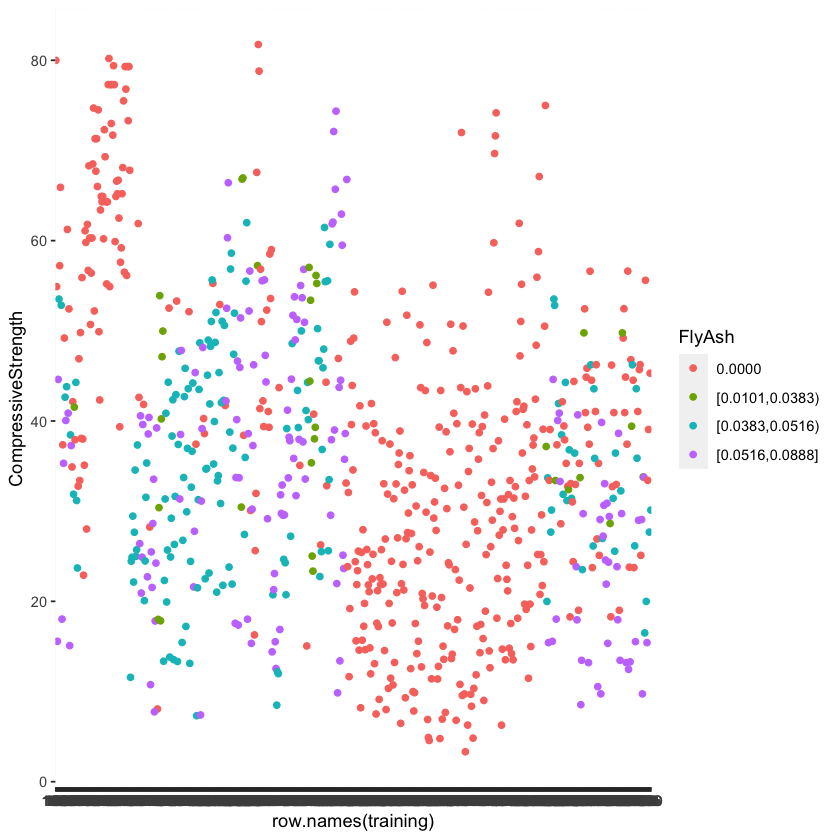

In [6]:
g <- ggplot(data = training)
g <- g + aes(x = row.names(training), y = CompressiveStrength)
g <- g + geom_point()
g <- g + aes(color = FlyAsh)
print(g)

Warning message in Ops.factor(Superplasticizer, 1):
“‘+’ not meaningful for factors”
Warning message in Ops.factor(Superplasticizer, 1):
“‘+’ not meaningful for factors”
Warning message:
“Removed 774 rows containing non-finite values (stat_density).”


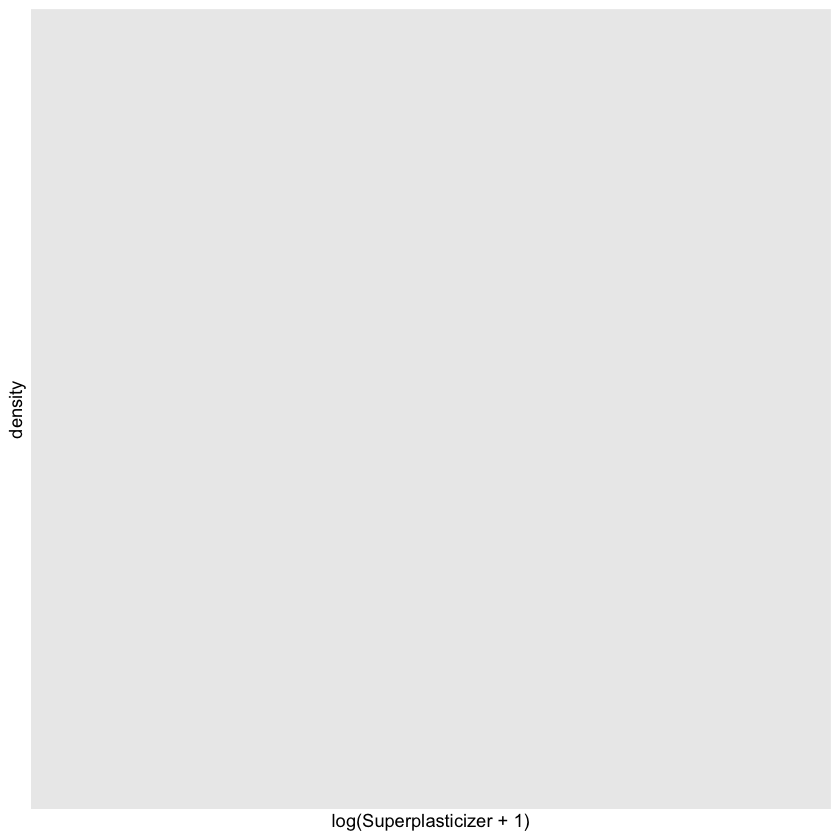

In [7]:
g <- ggplot(data = training)
g <- g + aes(x = log(Superplasticizer + 1))
g <- g + geom_density()

print(g)

## Alzheimer Data

In [8]:
set.seed(3433)
data(AlzheimerDisease)
adData <- data.frame(diagnosis, predictors)
inTrain <- createDataPartition(adData$diagnosis, p = 3 / 4)[[1]]
training <- adData[inTrain, ]
testing <- adData[-inTrain, ]

training <- as_tibble(training)
training <- training %>%
    select(c(
        grep("IL", names(training)),
        "diagnosis"
    ))
preObjpca <- preProcess(
    x = training[, -13],
    method = "pca", thresh = 0.9
)

preObjpca

Created from 251 samples and 13 variables

Pre-processing:
  - centered (12)
  - ignored (1)
  - principal component signal extraction (12)
  - scaled (12)

PCA needed 9 components to capture 90 percent of the variance

In [9]:
training <- as_tibble(training)
training <- training %>%
    select(c(
        grep("^IL", names(training)),
        "diagnosis"
    ))

testing <- as_tibble(testing)
testing <- testing %>%
    select(c(
        grep("^IL", names(testing)),
        "diagnosis"
    ))


preObjpca <- preProcess(
    x = training[, -13],
    method = "pca", thresh = 0.8
)

trainPC <- predict(preObjpca, training)

mdl1 <- train(
    diagnosis ~ .,
    method = "glm",
    data = trainPC,
)

testingPre <- predict(preObjpca, testing)

result <- predict(mdl1, testingPre)
confusionMatrix(testing$diagnosis, result)

Confusion Matrix and Statistics

          Reference
Prediction Impaired Control
  Impaired        1      21
  Control         2      58
                                          
               Accuracy : 0.7195          
                 95% CI : (0.6094, 0.8132)
    No Information Rate : 0.9634          
    P-Value [Acc > NIR] : 1.0000000       
                                          
                  Kappa : 0.0167          
                                          
 Mcnemar's Test P-Value : 0.0001746       
                                          
            Sensitivity : 0.33333         
            Specificity : 0.73418         
         Pos Pred Value : 0.04545         
         Neg Pred Value : 0.96667         
             Prevalence : 0.03659         
         Detection Rate : 0.01220         
   Detection Prevalence : 0.26829         
      Balanced Accuracy : 0.53376         
                                          
       'Positive' Class : Impaired        
   

In [10]:
training <- as_tibble(training)
training <- training %>%
    select(c(
        grep("^IL", names(training)),
        "diagnosis"
    ))

testing <- as_tibble(testing)
testing <- testing %>%
    select(c(
        grep("^IL", names(testing)),
        "diagnosis"
    ))


# preObjpca <- preProcess(
# x = training[, -13],
# method = "pca", thresh = 0.8
# )

trainPC <- training

mdl2 <- train(
    diagnosis ~ .,
    method = "glm",
    data = trainPC,
)

# testingPre <- predict(preObjpca, testing)
testingPre <- testing

result <- predict(mdl2, testingPre)
confusionMatrix(testing$diagnosis, result)

Confusion Matrix and Statistics

          Reference
Prediction Impaired Control
  Impaired        4      18
  Control         2      58
                                          
               Accuracy : 0.7561          
                 95% CI : (0.6488, 0.8442)
    No Information Rate : 0.9268          
    P-Value [Acc > NIR] : 0.9999997       
                                          
                  Kappa : 0.1929          
                                          
 Mcnemar's Test P-Value : 0.0007962       
                                          
            Sensitivity : 0.66667         
            Specificity : 0.76316         
         Pos Pred Value : 0.18182         
         Neg Pred Value : 0.96667         
             Prevalence : 0.07317         
         Detection Rate : 0.04878         
   Detection Prevalence : 0.26829         
      Balanced Accuracy : 0.71491         
                                          
       'Positive' Class : Impaired        
   

In [11]:
library(caret)
library(AppliedPredictiveModeling)
set.seed(3433)
data(AlzheimerDisease)
adData <- data.frame(diagnosis, predictors)
inTrain <- createDataPartition(adData$diagnosis, p = 3 / 4)[[1]]
training <- adData[inTrain, ]
testing <- adData[-inTrain, ]

# grep all columns with IL and diagnosis in the traning and testing set
trainingIL <- training[, grep("^IL|diagnosis", names(training))]
testingIL <- testing[, grep("^IL|diagnosis", names(testing))]

# non-PCA
model <- train(diagnosis ~ ., data = trainingIL, method = "glm")
predict_model <- predict(model, newdata = testingIL)
matrix_model <- confusionMatrix(predict_model, testingIL$diagnosis)
matrix_model$overall[1]

Accuracy 
0.7560976

In [12]:
library(AppliedPredictiveModeling)
data(segmentationOriginal)
library(caret)
library(rpart)
set.seed(125)
library(rattle)

Loading required package: tibble

Loading required package: bitops

Rattle: A free graphical interface for data science with R.
Version 5.5.1 Copyright (c) 2006-2021 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.



In [13]:
trainSet <- segmentationOriginal[segmentationOriginal$Case == "Train", ]
testSet <- segmentationOriginal[segmentationOriginal$Case == "Test", ]

modelFit <- train(Class ~ ., data = trainSet, method = "rpart")

In [14]:
x <- as_tibble(testSet[1:4, ])
# x <- select(
# x,
# )
x <- new_tibble(x)
x[1, ]$TotalIntenCh2 <- 23000
x[1, ]$FiberWidthCh1 <- 10
x[1, ]$PerimStatusCh1 <- 2

x[2, ]$TotalIntenCh2 <- 50000
x[2, ]$FiberWidthCh1 <- 10
x[2, ]$VarIntenCh4 <- 100

x[3, ]$TotalIntenCh2 <- 57000
x[3, ]$FiberWidthCh1 <- 8
x[3, ]$VarIntenCh4 <- 100

x[4, ]$FiberWidthCh1 <- 8
x[4, ]$VarIntenCh4 <- 100
x[4, ]$PerimStatusCh1 <- 2

In [15]:
library(pgmm)
data(olive)
olive <- olive[, -1]

In [16]:
modelFit <- train(Area ~ ., data = olive, method = "rpart")

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


### Question 4
Load the South Africa Heart Disease Data and create training and test sets with the following code:

In [17]:
library(ElemStatLearn)
data(SAheart)
set.seed(8484)
train <- sample(1:dim(SAheart)[1], size = dim(SAheart)[1] / 2, replace = F)
trainSA <- SAheart[train, ]
testSA <- SAheart[-train, ]
set.seed(13234)

Then set the seed to 13234 and fit a logistic regression model  (method="glm", be sure to specify family="binomial") with Coronary Heart Disease (chd) as the outcome and age at onset, current alcohol consumption, obesity levels, cumulative tabacco, type-A behavior, and low density lipoprotein cholesterol as predictors. Calculate the misclassification rate for your model using this function and a prediction on the "response" scale:

In [18]:
# trainSA$chd <- as.factor(trainSA$chd)
# trainSA <- trainSA[, c("chd", "typea", "obesity", "alcohol", "age", "tobacco", "ldl")]
model4 <- train(chd ~ typea + obesity + alcohol + age + tobacco + ldl,
    data = trainSA, method = "glm", family = "binomial"
)
# model4 <- train(chd ~ ., data = trainSA, method = "glm", family = binomial())

Warning message in train.default(x, y, weights = w, ...):
“You are trying to do regression and your outcome only has two possible values Are you trying to do classification? If so, use a 2 level factor as your outcome column.”


In [19]:
# trainSA$chd <- as.integer(trainSA$chd)
missClass <- function(values, prediction) {
    sum(((prediction > 0.5) * 1) != values) / length(values)
}

missClass(
    trainSA$chd,
    predict(model4, newdata = trainSA)
)

missClass(
    testSA$chd,
    predict(model4, newdata = testSA)
)

[1] 0.3116883

[1] 0.2813853

In [20]:
set.seed(13234)
modelSA <- train(chd ~ age + alcohol + obesity + tobacco + typea + ldl,
    data = trainSA, method = "glm", family = "binomial"
)
print("test")
missClass(testSA$chd, predict(modelSA, newdata = testSA))

# print("train")
# missClass(trainSA$chd, predict(modelSA, newdata = trainSA))

Warning message in train.default(x, y, weights = w, ...):
“You are trying to do regression and your outcome only has two possible values Are you trying to do classification? If so, use a 2 level factor as your outcome column.”


[1] "test"


[1] 0.2813853

In [21]:
library(ElemStatLearn)
library(randomForest)
data(vowel.train)
data(vowel.test)
set.seed(33833)

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:rattle’:

    importance


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin




In [22]:
vowel.train$y <- as.factor(vowel.train$y)
vowel.test$y <- as.factor(vowel.test$y)

model5 <- randomForest(y ~ ., data = vowel.train)

## Quiz 4
### Question 1
Set the variable y to be a factor variable in both the training and test set. Then set the seed to 33833. Fit (1) a random forest predictor relating the factor variable y to the remaining variables and (2) a boosted predictor using the "gbm" method. Fit these both with the train() command in the caret package. 

What are the accuracies for the two approaches on the test data set? What is the accuracy among the test set 

In [23]:
library(caret)
library(ElemStatLearn)
data(vowel.train)
data(vowel.test)
set.seed(33833)

vowel.test$y <- as.factor(vowel.test$y)
vowel.train$y <- as.factor(vowel.train$y)

model_rf <- train(y ~ ., data = vowel.train, method = "rf")
model_gbm <- train(y ~ ., data = vowel.train, method = "gbm", verbose = FALSE)

pred_rf <- predict(model_rf, vowel.test)
table(pred_rf, vowel.test$y)
pred_gbm <- predict(model_gbm, vowel.test)
table(pred_gbm, vowel.test$y)


sum(pred_rf == vowel.test$y) / length(pred_rf)
sum(pred_gbm == vowel.test$y) / length(pred_gbm)

n1 <- sum(pred_rf == pred_gbm)
n2 <- sum(pred_rf == pred_gbm) && (pred_rf == vowel.test$y)
# / sum(pre)

       
pred_rf  1  2  3  4  5  6  7  8  9 10 11
     1  33  1  0  0  0  0  0  0  0  1  0
     2   9 23  3  0  0  0  0  0  0 17  1
     3   0 15 32  3  0  0  0  0  0  3  1
     4   0  0  4 30  3  0  0  0  0  0  2
     5   0  0  0  0 16  8  9  0  0  0  0
     6   0  0  3  8 20 26  5  0  0  0  6
     7   0  0  0  0  3  0 27  6  5  0  3
     8   0  0  0  0  0  0  0 29  5  0  0
     9   0  3  0  0  0  0  0  7 24  2 12
     10  0  0  0  0  0  0  1  0  2 19  0
     11  0  0  0  1  0  8  0  0  6  0 17

        
pred_gbm  1  2  3  4  5  6  7  8  9 10 11
      1  28  0  0  0  0  0  0  0  0  2  0
      2  10 21  1  0  0  0  1  0  0 13  0
      3   2  9 11  3  0  0  0  0  0  0  0
      4   0  0  7 23  3  0  1  0  0  0  0
      5   0  0  0  2 17  6  1  0  0  0  0
      6   0  2 18 13 10 28  0  0  3  0 10
      7   0  0  0  0  8  1 37  9  5  0 10
      8   0  0  0  0  0  0  2 28  8  0  0
      9   0  6  0  0  0  0  0  5 26  5 18
      10  2  0  0  0  0  0  0  0  0 22  0
      11  0  4  5  1  4  7  0  0  0  0  4

[1] 0.5974026

[1] 0.530303

### Question 2
Load the Alzheimer's data using the following commands:

Set the seed to 62433 and predict diagnosis with all the other variables using a random forest ("rf"), boosted trees ("gbm") and linear discriminant analysis ("lda") model. Stack the predictions together using random forests ("rf"). What is the resulting accuracy on the test set? Is it better or worse than each of the individual predictions? 

- [ ] Stacked Accuracy: 0.80 is better than random forests and lda and the same as boosting. 

- [ ] Stacked Accuracy: 0.76 is better than lda but not random forests or boosting. 

- [ ] Stacked Accuracy: 0.69 is better than all three other methods

- [x] Stacked Accuracy: 0.80 is better than all three other methods

In [25]:
library(caret)
library(gbm)
set.seed(3433)
library(AppliedPredictiveModeling)
data(AlzheimerDisease)
adData <- data.frame(diagnosis, predictors)
inTrain <- createDataPartition(adData$diagnosis, p = 3 / 4)[[1]]
training <- adData[inTrain, ]
testing <- adData[-inTrain, ]
set.seed(62433)

model_rf <- train(diagnosis ~ ., data = training, method = "rf", verbose = FALSE)
pred_rf <- predict(model_rf, testing)

confusionMatrix(
    training$diagnosis,
    pred_rf
)

model_gbm <- train(diagnosis ~ ., data = training, method = "gbm", verbose = FALSE)
pred_gbm <- predict(model_gbm, testing)

confusionMatrix(
    testing$diagnosis,
    pred_gbm
)

model_lda <- train(diagnosis ~ ., data = training, method = "lda")
pred_lda <- predict(model_lda, testing)

confusionMatrix(
    testing$diagnosis,
    pred_lda
)

stack_train <- data.frame(diagnosis = testing$diagnosis, rf = pred_rf, gbm = pred_gbm, lda = pred_lda)
model_stack <- train(diagnosis ~ ., data = stack_train, method = "rf")
pred_stack <- predict(model_stack, newdata = stack_train)

confusionMatrix(
    stack_train$diagnosis,
    pred_stack
)

ERROR: Error in table(data, reference, dnn = dnn, ...): all arguments must have the same length


### Question 3
3. Load the concrete data with the commands:


Set the seed to 233 and fit a lasso model to predict Compressive Strength. Which variable is the last coefficient to be set to zero as the penalty increases? (Hint: it may be useful to look up ?plot.enet). 

- [x] Cement

- [ ] CoarseAggregate

- [ ] Age

- [ ] Water

In [ ]:
set.seed(3523)
library(AppliedPredictiveModeling)
data(concrete)
inTrain <- createDataPartition(concrete$CompressiveStrength, p = 3 / 4)[[1]]
training <- concrete[inTrain, ]
testing <- concrete[-inTrain, ]
set.seed(233)

model_lasso <- train(CompressiveStrength ~ ., data = training, method = "lasso")
library(elasticnet)

plot.enet(model_lasso$finalModel, xvar = "penalty", use.color = TRUE)


### Question 4
Load the data on the number of visitors to the instructors blog from here: 

"https://d396qusza40orc.cloudfront.net/predmachlearn/gaData.csv"

Using the commands:


Fit a model using the bats() function in the forecast package to the training time series. Then forecast this model for the remaining time points. For how many of the testing points is the true value within the 95% prediction interval bounds? 

- [ ] 96%

- [ ] 94%

- [ ] 95%

- [ ] 93%

In [27]:
library(forecast) # For year() function below
library(lubridate) # For year() function below
dat <- read.csv("../input/gaData.csv")
training <- dat[year(dat$date) < 2012, ]
testing <- dat[(year(dat$date)) > 2011, ]
tstrain <- ts(training$visitsTumblr)

model_bats <- bats(tstrain)
fcast <- forecast(model_bats, level = 95, h = dim(testing)[1])

sum(fcast$lower < testing$visitsTumblr & testing$visitsTumblr < fcast$upper) /
    dim(testing)[1]

[1] 0.9617021

### Question 5
Load the concrete data with the commands:

Set the seed to 325 and fit a support vector machine using the e1071 package to predict Compressive Strength using the default settings. Predict on the testing set. What is the RMSE?

- [ ] 107.44

- [ ] 6.93

- [ ] 11543.39

- [ ] 6.72


In [28]:
set.seed(3523)
library(AppliedPredictiveModeling)
library(e1071)
data(concrete)
inTrain <- createDataPartition(concrete$CompressiveStrength, p = 3 / 4)[[1]]
training <- concrete[inTrain, ]
testing <- concrete[-inTrain, ]
set.seed(325)

model_svm <- svm(CompressiveStrength ~ ., data = training)
pred_svm <- predict(model_svm, testing)
# sum(mo)

sum((testing$CompressiveStrength - pred_svm)^2) / length(pred_svm)
accuracy(pred_svm, testing$CompressiveStrength)


Attaching package: ‘e1071’


The following object is masked from ‘package:Hmisc’:

    impute




[1] 63.39464

,ME,RMSE,MAE,MPE,MAPE
Test set,0.3113479,7.962075,5.515605,-6.845664,20.31935
